In [32]:
import pandas as pd
# 오류가 있는 줄은 무시하고 파일 읽기
df = pd.read_excel('sample_data.xlsx')

In [33]:
df.head()

,Unnamed: 0,ID,score,year_month,uniq_key
0,0,S0005473355,0.247997,202201,S0005473355202201
1,1,S0120444760,0.140447,202201,S0120444760202201
2,2,S0171811650,0.274217,202201,S0171811650202201
3,3,S0153794821,0.192828,202201,S0153794821202201
4,4,S0132364005,0.340263,202201,S0132364005202201


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30000 non-null  int64  
 1   ID          30000 non-null  object 
 2   score       30000 non-null  float64
 3   year_month  30000 non-null  int64  
 4   uniq_key    30000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


In [35]:
df['year_month'] = df['year_month'].astype(str)

In [36]:
# 스코어링
import numpy as np
def get_score(x, epsilon = 1e-15):
    # epsilon을 사용하여 x의 값을 조정
    x = np.clip(x,epsilon,1-epsilon)
    #주어진 공식을 적용
    if x> 0 :
        score = np.round(633.8263394*np.log(x / (1-x)) +1392.0751693)
    else:
        score = 0
    return score

def get_score_g(x):

    score = 0

    if x >=940  : score = 940
    elif x  >=830: score = 830
    elif x  >=720 : score = 720
    elif x  >=610 : score = 610
    elif x  >=500 : score = 500
    elif x  >=390: score = 390
    elif x  >=280: score = 280
    elif x  >=170 : score = 170
    elif x  >=100 : score = 100
    else : score= 0

    return score

In [37]:
df_2201 = df[df['year_month']=='202201'].reset_index(drop=True)

In [38]:
%%time
df_2201['prob'] = df_2201['score']
df_2201['score'] = df_2201['prob'].apply(lambda x :  get_score(x))
df_2201['score_g'] = df_2201['score'].apply(lambda x :  get_score_g(x))
df_2201['1000_score'] = df_2201['prob']*1000

CPU times: user 32.3 ms, sys: 638 μs, total: 32.9 ms
Wall time: 32.4 ms


In [39]:
df_2201.head(5)

,Unnamed: 0,ID,score,year_month,uniq_key,prob,score_g,1000_score
0,0,S0005473355,689.0,202201,S0005473355202201,0.247997,610,247.99660
1,1,S0120444760,244.0,202201,S0120444760202201,0.140447,170,140.44650
2,2,S0171811650,775.0,202201,S0171811650202201,0.274217,720,274.21710
3,3,S0153794821,485.0,202201,S0153794821202201,0.192828,390,192.82831
4,4,S0132364005,972.0,202201,S0132364005202201,0.340263,940,340.26330


In [40]:
%%time
score_gr = df_2201.groupby(['score_g'])['score'].agg(['sum','size']).reset_index()
df_score_1 = score_gr.sort_values(['score_g'],ascending=False)
score_gr.sort_values(['score_g'],ascending=False)

CPU times: user 1.44 ms, sys: 631 μs, total: 2.07 ms
Wall time: 1.78 ms


,score_g,sum,size
9,940,373025.0,339
8,830,153682.0,174
7,720,315444.0,419
6,610,658472.0,979
5,500,530588.0,963
4,390,722162.0,1654
3,280,555300.0,1668
2,170,488884.0,2196
1,100,118004.0,851
0,0,-7831.0,757


<timed exec>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



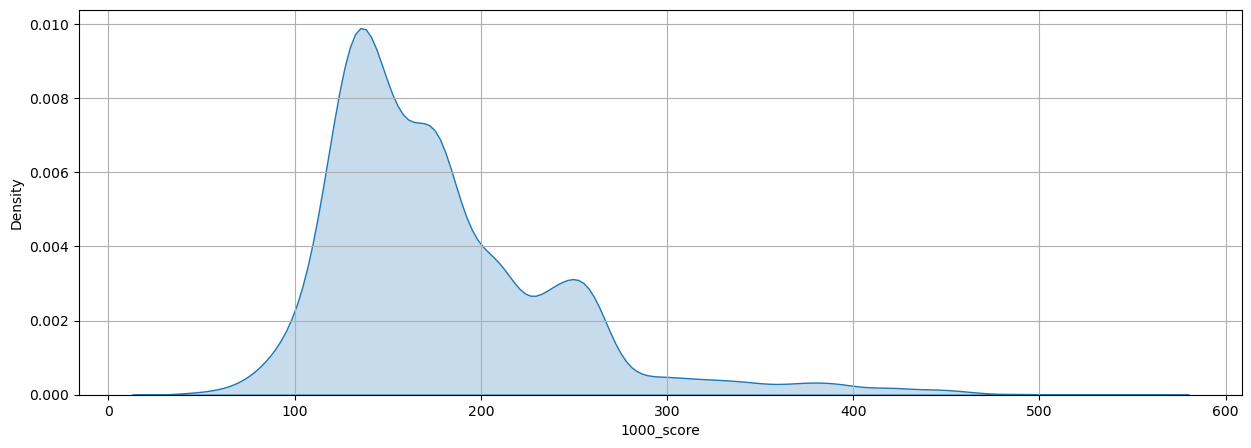

CPU times: user 447 ms, sys: 79.6 ms, total: 527 ms
Wall time: 81.4 ms


In [41]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.kdeplot(df_2201['1000_score'],shade=True)
plt.grid(True)
plt.show()

In [42]:
#len(df_split_2[df_split_2['1000_score']>=350])

In [43]:
#len(df_split_2[df_split_2['1000_score']<=100])

In [44]:
#df_split_2[df_split_2['1000_score']<=350]['pred_proba'].max()

In [45]:
#df_split_2[df_split_2['1000_score']>=100]['pred_proba'].min()

In [46]:
df_2203= df[df['year_month']=='202203']
df_2205= df[df['year_month']=='202205']

In [47]:
%%time
df_2203['prob'] = df_2203['score']
df_2203['score'] = df_2203['score'].apply(lambda x :  get_score(x))
df_2203['score_g'] = df_2203['score'].apply(lambda x :  get_score_g(x))
df_2203['1000_score'] = df_2203['prob']*1000

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 233 ms, sys: 293 ms, total: 525 ms
Wall time: 73.7 ms


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
%%time
df_2205['prob'] = df_2205['score']
df_2205['score'] = df_2205['score'].apply(lambda x :  get_score(x))
df_2205['score_g'] = df_2205['score'].apply(lambda x :  get_score_g(x))
df_2205['1000_score'] = df_2205['prob']*1000

CPU times: user 129 ms, sys: 157 ms, total: 286 ms
Wall time: 48.4 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [49]:
%%time
score_gr = df_2203.groupby(['score_g'])['score'].agg(['sum','size']).reset_index()
df_score_2 = score_gr.sort_values(['score_g'],ascending=False)
score_gr.sort_values(['score_g'],ascending=False)

CPU times: user 2.14 ms, sys: 813 μs, total: 2.95 ms
Wall time: 2.72 ms


,score_g,sum,size
9,940,229768.0,220
8,830,241385.0,274
7,720,840612.0,1089
6,610,573327.0,864
5,500,707837.0,1278
4,390,570978.0,1302
3,280,556348.0,1672
2,170,360005.0,1562
1,100,80382.0,588
0,0,15882.0,1151


In [50]:
df_score_2

,score_g,sum,size
9,940,229768.0,220
8,830,241385.0,274
7,720,840612.0,1089
6,610,573327.0,864
5,500,707837.0,1278
4,390,570978.0,1302
3,280,556348.0,1672
2,170,360005.0,1562
1,100,80382.0,588
0,0,15882.0,1151


In [51]:
%%time
score_gr = df_2205.groupby(['score_g'])['score'].agg(['sum','size']).reset_index()
df_score_3 = score_gr.sort_values(['score_g'],ascending=False)
score_gr.sort_values(['score_g'],ascending=False)

CPU times: user 1.32 ms, sys: 579 μs, total: 1.89 ms
Wall time: 1.39 ms


,score_g,sum,size
9,940,111388.0,101
8,830,47452.0,54
7,720,219594.0,293
6,610,589770.0,882
5,500,524480.0,953
4,390,627799.0,1426
3,280,475353.0,1418
2,170,402755.0,1783
1,100,159890.0,1164
0,0,-38091.0,1926


In [52]:
from sklearn.metrics import roc_auc_score

# PSI 계산 함수 (등급별 PSI 반환)
def calculate_psi(expected, actual):
    psi_values = []
    for e, a in zip(expected, actual):
        if e == 0 or a == 0:
            psi = 0  # 분모가 0일 경우 PSI 값은 0으로 처리
        else:
            psi = (e - a) * np.log(e / a)
        psi_values.append(psi)
    total_psi = np.sum(psi_values)
    return psi_values, total_psi

# 각 데이터프레임에서 'size' 비율 계산
df_score_1['proportion'] = df_score_1['size'] / df_score_1['size'].sum()
df_score_2['proportion'] = df_score_2['size'] / df_score_2['size'].sum()
df_score_3['proportion'] = df_score_3['size'] / df_score_3['size'].sum()

# PSI 계산 (등급별 및 총합)
psi_values_202203, psi_total_202203 = calculate_psi(df_score_1['proportion'], df_score_2['proportion'])
psi_values_202205, psi_total_202205 = calculate_psi(df_score_1['proportion'], df_score_3['proportion'])

# 등급별 및 총합 PSI 출력
print(f"202203 등급별 PSI: {psi_values_202203}")
print(f"202203 총합 PSI: {psi_total_202203}")

print(f"202205 등급별 PSI: {psi_values_202205}")
print(f"202205 총합 PSI: {psi_total_202205}")

# AUC 계산 함수
def calculate_auc(df_base, df_compare):
    # 'sum'을 기준으로 긍정/부정 클래스 비율 설정 (임의로 지정 가능)
    y_true = (df_base['sum'] > df_base['sum'].mean()).astype(int)  # 기준 데이터의 클래스
    y_scores = df_compare['sum']  # 비교 데이터의 예측값
    auc = roc_auc_score(y_true, y_scores)
    return auc

# AUC 계산
auc_202203 = calculate_auc(df_score_1, df_score_2)
auc_202205 = calculate_auc(df_score_1, df_score_3)

print(f"202203 AUC: {auc_202203}")
print(f"202205 AUC: {auc_202205}")

202203 등급별 PSI: [0.005145233476234257, 0.0045407280717354144, 0.06399466160172512, 0.0014370270478542295, 0.008914444028889669, 0.008423185859092287, 9.580842903818896e-07, 0.021598507939368673, 0.00972272025174585, 0.016509512318206684]
202203 총합 PSI: 0.14028697867914255
202205 등급별 PSI: [0.02881893425483274, 0.014040855031803053, 0.004506998717403887, 0.001012093989280076, 1.0438508143923392e-05, 0.0033817706610942094, 0.00405944689566548, 0.0086044496308474, 0.009803332141173685, 0.1091655849198207]
202205 총합 PSI: 0.18340390475006516
202203 AUC: 0.8
202205 AUC: 1.0
